In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from curriculum_learning.models.classifier_model import ClassifierModel
from curriculum_learning.utils import losses_ordering, loading_data
import yaml

In [2]:
with open("models_hyperparameters.yaml", "r") as stream:
    models_hyperparameters = yaml.safe_load(stream)
    
x, y = loading_data.load_data("../data/cifar-10-batches-py/data_batch_1")

In [3]:
test_model_1 = models_hyperparameters["assessment_model"]
model = ClassifierModel(output_shape=10, **test_model_1)

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [5]:
model.fit(x, y, epochs=3)

Epoch 1/3
313/313 [==============================] - 3s 7ms/step - loss: 2.2408 - accuracy: 0.1975
Epoch 2/3
313/313 [==============================] - 2s 7ms/step - loss: 1.8738 - accuracy: 0.3066
Epoch 3/3
313/313 [==============================] - 2s 7ms/step - loss: 1.7498 - accuracy: 0.3447


In [6]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [7]:
pred = model.predict(x)

313/313 [==============================] - 1s 2ms/step


In [8]:
losses = losses_ordering.calculate_loss_per_sample(y, pred, loss)

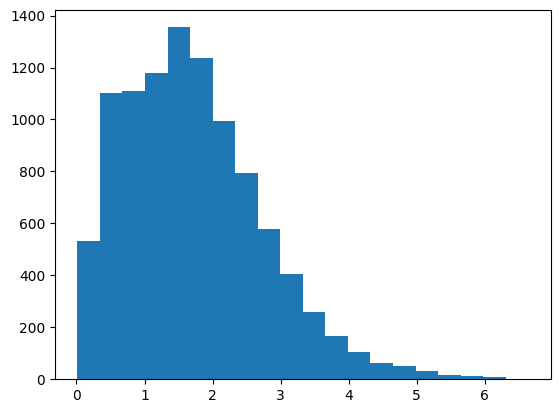

In [13]:
plt.hist(losses, bins=20)
plt.show()